In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file


def get_data():
    data = load_svmlight_file("australian.txt")
    return data[0], data[1]

X, y = get_data()
#print(X.shape)
row=690
col=14
train_X = X[0:690]
train_y = y[0:690]

In [2]:
from numpy import *
import  numpy as np
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)
Xt=X_train.toarray()
Xv=X_validation.toarray()
Yt=mat(y_train)
Yt=np.array(Yt)
Yv=mat(y_validation)
Yv=np.array(Yv)
row,col=Xt.shape
rowV,colV=Xv.shape

print("Xt.shape",Xt.shape)
print("Yt.shape",Yt.shape)

Xt.shape (462, 14)
Yt.shape (1, 462)


In [3]:
w=[np.float(1)for i in range(0,col)]
w=np.array(w)
print("w",w)
Wgrad_average=([1.00 for i in range(0,col)])
Wgrad_average=np.array(Wgrad_average)
print("Wgrad_average",Wgrad_average)

w [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Wgrad_average [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [4]:
def lossGrad(X,y,w):
    row,col=X.shape
    err=np.array([np.float(0) for i in range(0,row)]).reshape(row,1)
    x=mat(X)
    y=np.array(y).reshape(row,1)
    for i in range(0,row):
        Xi=x[i,:].reshape(1,col)
        Yi=np.float(y[i,:])
        err[i]=Yi * Xi.dot(w)
    return err

In [5]:
time=100
loss=[np.float(0)for i in range(0,time)]
errorRate =[np.float(0)for i in range(0,time)]
errorRateV=[np.float(0)for i in range(0,time)]

nita=0.01
for j in range(0,time):
  k=0
  kV=0
  err=lossGrad(Xt,Yt,w)
  errV = lossGrad(Xv, Yv, w)
  C=0.9
  Wgrad = np.zeros((row, col)).reshape(row,col)
  for i in range(0, row):
      k+=1
      Wgrad[i,:]=w
  for i in range(0,row):
      erri=np.float(err[i])
      if 1-erri>=0:
          k-=1
          Wgrad[i,:]=Wgrad[i,:]-C*Yt.dot(Xt)
  for i in range(0, rowV):
      kV += 1
  for i in range(0,rowV):
      erriV = np.float(errV[i])
      if 1 - erriV >= 0:
          kV-=1
  errorRate[j] = 1.0 - np.float(k / row)
  errorRateV[j] = 1.0 - np.float(kV / rowV)
  Wgrad_average=np.mean(Wgrad,axis=0)
  w=w-nita*Wgrad_average


print("w",w)
err=lossGrad(Xt,Yt,Wgrad_average)
print("err",err)

w [ -1.43119315   3.51584659   6.07910512   5.05878778  10.79608675
   6.4067069    6.07910675  33.51485802  22.13242993   5.82029788
   2.56264127   1.86372025   2.28556901   4.07647226]
err [[-37.82040815]
 [-17.65362781]
 [-19.85273134]
 [-39.3006068 ]
 [-21.81902322]
 [-14.08519903]
 [-34.32030274]
 [ 21.18924468]
 [-41.60483947]
 [-21.57439282]
 [-37.05402896]
 [-15.24542699]
 [-36.60288088]
 [-18.3995766 ]
 [-36.76871364]
 [  5.05453921]
 [  3.76981362]
 [ 19.25883331]
 [-31.8533144 ]
 [  0.93441787]
 [-21.33161859]
 [-20.30611072]
 [-23.85364362]
 [-24.54607959]
 [-16.6581555 ]
 [-36.3408299 ]
 [-19.24954449]
 [-13.75370411]
 [-15.20815671]
 [  4.18030457]
 [ -3.04493646]
 [ -1.38288272]
 [-19.53493827]
 [-34.00558196]
 [-41.39877314]
 [-23.53845603]
 [-17.95603555]
 [-33.05681535]
 [-39.28485275]
 [ 34.63626375]
 [  0.82879679]
 [-21.0435171 ]
 [-16.5605822 ]
 [-37.28144334]
 [-38.7854802 ]
 [-37.43535936]
 [ -1.55937013]
 [-36.51117336]
 [ -2.74205709]
 [-22.90096332]
 [-25.81

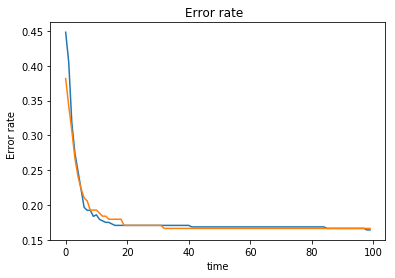

In [6]:
x_data=np.arange(0,time,1)
y_data=errorRate
y_data2=errorRateV
import matplotlib.pyplot as plt
plt.plot(x_data,y_data)
plt.plot(x_data,y_data2)
plt.title(u"Error rate  ")
plt.legend()
plt.xlabel(u"time")
plt.ylabel(u"Error rate  ")
plt.show()